## Hamiltonian Operations
***
The QAOAToolkit modularized the hamiltonians in QAOA circuits into *phase_hamiltonian* and *mixer_hamiltonian*, however, Users may wish to create various *phase_hamiltonian* objects seperately and then perform various operations on them,making it simple to deal smaller Hamiltonaians at a time. These operators are handled in the parent hamiltonian class. Defining 2 different hamiltonians as
$H_f$ and $H_g$:

• $\bar{H_f}= I − H_f$

• $H_{fg} = H_f * H_g$

• $H_{f+g} = H_f + H_g − H_f * H_g$

• $H_{af+bg} = aH_f + bH_g$



$H_f$ is $f(\frac{1}{2} (I − Z))$,hence in QAOAToolkit the operations above uses the objective function instead:

• $\bar{f(x)} = 1 − f (x)$

• $f(x)g(y) = f (x) ∗ g(x)$

• $f(x) + g(x) = f(x) + g(x) − f(x) ∗ g(x)$

• $af(x) + bg(x) = a∗f(x) + b∗g(x)$

In [1]:
import os 
os.path.sys.path.append('../hamiltonian_engine/')
from hamiltonian import phase_hamiltonian as phs_ham
from hamiltonian import mixer_hamiltonian as mix_ham
from expectation_value import expectation_value as ex_vle

First, we declare 2 different but simple Objective functions which we will convert into phase_hamiltonian:

In [2]:
obj1 = 'x_1 + x_2 + x_3'
v1 = ['x_1', 'x_2', 'x_3']

p1 = phs_ham(obj1, v1)
p1.get_objFun()

x_1 + x_2 + x_3

In [3]:
p1.Hamify()
p1.get_pHamil()

1.5*I - 0.5*Z_1 - 0.5*Z_2 - 0.5*Z_3

In [4]:
obj2 = 'x_u * x_v'
v2 = ['x_v', 'x_u']

p2 = phs_ham(obj2, v2)
p2.get_objFun()

x_u*x_v

In [5]:
p2.Hamify()
p2.get_pHamil()

0.25*I + 0.25*Z_u*Z_v - 0.25*Z_u - 0.25*Z_v

#### $\bar{H_f}= I − H_f$

In [6]:
p3 = ~p1
p3.get_objFun()

-x_1 - x_2 - x_3 + 1

In [7]:
p3.Hamify()
p3.get_pHamil()

-1.5*I + 0.5*Z_1 + 0.5*Z_2 + 0.5*Z_3 + 1

#### $H_{fg} = H_f * H_g$

In [8]:
p4 = p2 * p1
p4.get_objFun()

x_u*x_v*(x_1 + x_2 + x_3)

In [9]:
p4.Hamify()
p4.get_pHamil()

0.375*I - 0.125*Z_1*Z_u*Z_v + 0.125*Z_1*Z_u + 0.125*Z_1*Z_v - 0.125*Z_1 - 0.125*Z_2*Z_u*Z_v + 0.125*Z_2*Z_u + 0.125*Z_2*Z_v - 0.125*Z_2 - 0.125*Z_3*Z_u*Z_v + 0.125*Z_3*Z_u + 0.125*Z_3*Z_v - 0.125*Z_3 + 0.375*Z_u*Z_v - 0.375*Z_u - 0.375*Z_v

#### $H_{af+bg} = aH_f + bH_g$

In [10]:
p5 = p2 * 3
p5.get_objFun()

3.0*x_u*x_v

In [11]:
p5.Hamify()
p5.get_pHamil()

0.75*I + 0.75*Z_u*Z_v - 0.75*Z_u - 0.75*Z_v

#### $H_{f+g} = H_f + H_g − H_f * H_g$

In [12]:
p6 = p1 + p2
p6.get_objFun()

x_1 + x_2 + x_3 - x_u*x_v*(x_1 + x_2 + x_3) + x_u*x_v

In [13]:
p6.Hamify()
p6.get_pHamil()

1.375*I + 0.125*Z_1*Z_u*Z_v - 0.125*Z_1*Z_u - 0.125*Z_1*Z_v - 0.375*Z_1 + 0.125*Z_2*Z_u*Z_v - 0.125*Z_2*Z_u - 0.125*Z_2*Z_v - 0.375*Z_2 + 0.125*Z_3*Z_u*Z_v - 0.125*Z_3*Z_u - 0.125*Z_3*Z_v - 0.375*Z_3 - 0.125*Z_u*Z_v + 0.125*Z_u + 0.125*Z_v

#### Combining Mixer and Phase Hamiltonians
***
In many cases, users will not be limiting their use of QAOA circuits to P=1 steps hence the Toolkit trys to minimize the amount to code users will have to write to stitch the circuits together. We decided to overload the *truediv* operator so that users can combine *phase_hamiltonians* and *mixer_hamiltonians* in a single step. In the example below, we will use P=2 and show how one can combine the 2 classes together

qubit mapping:  {'x_1': 0, 'x_2': 1, 'x_3': 2, 'x_u': 3, 'x_v': 4}


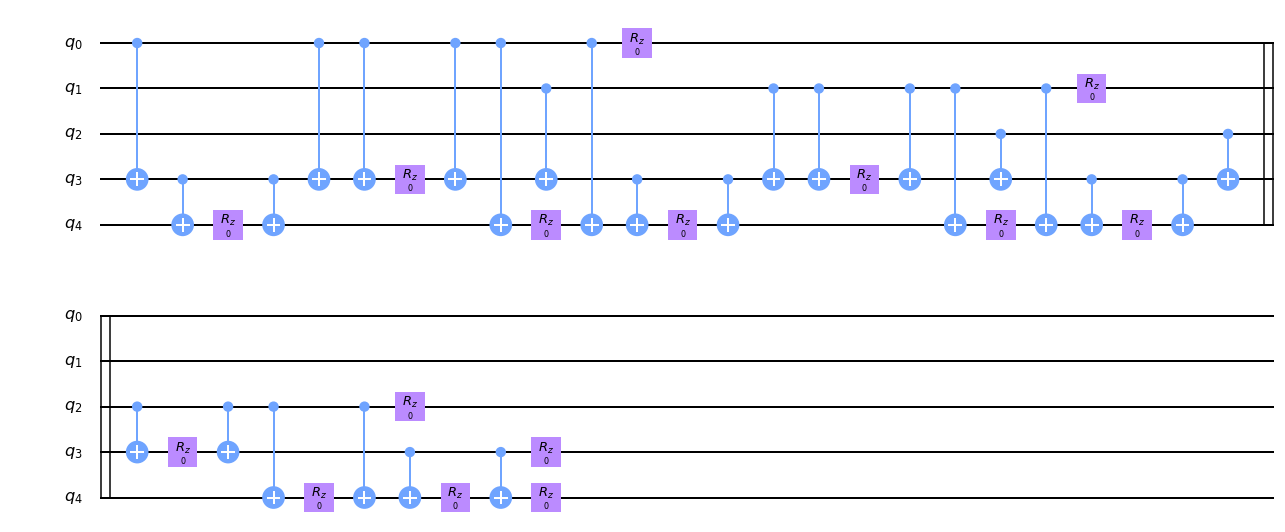

In [22]:
# P = 2 
gammas = [0.0, 0.0]
p6.perQubitMap(gammas, 2, barrier=False)

q_map = p6.get_qubitMap()
print("qubit mapping: ", q_map)

cir_list = p6.get_quantumCircuitAslist()[0]
cir_list.draw(output='mpl')

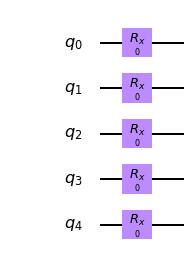

In [26]:
# Declare a mixer hamiltonain
mixer_hamiltonian = mix_ham()

betas = [0.0, 0.0]
mixer_hamiltonian.generalXMixer(betas, 2, q_map, True)
mcir_list = mixer_hamiltonian.get_quantumCircuitAslist()[0]
mcir_list.draw(output='mpl')

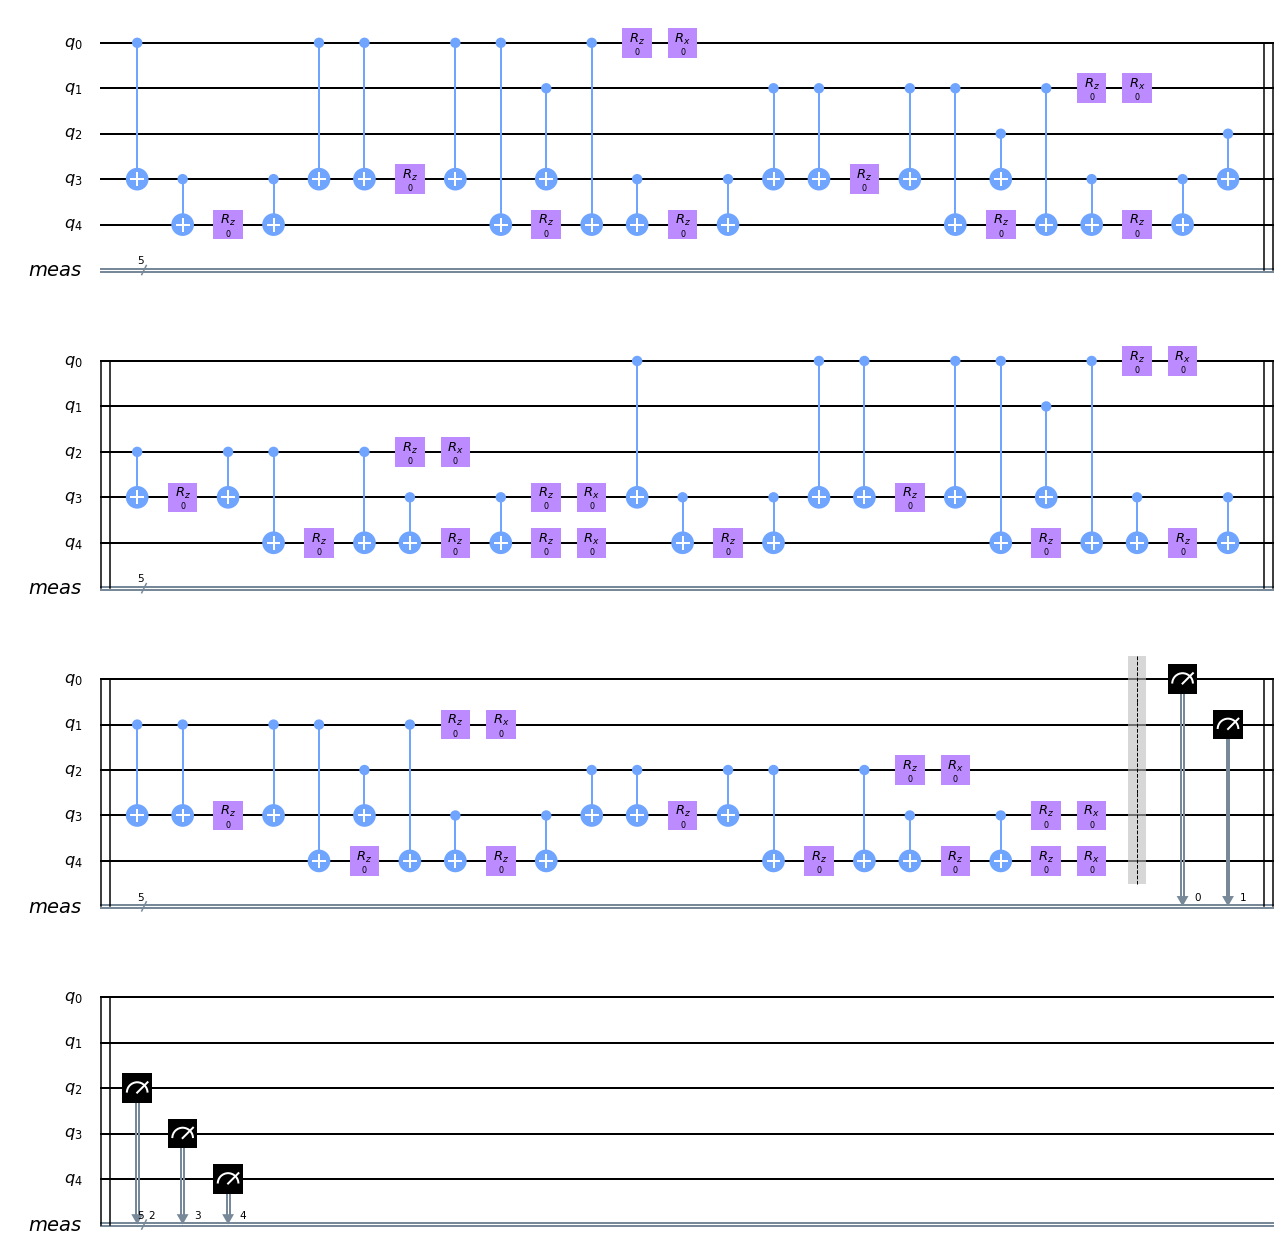

In [27]:
#combined circuit 
combine_cir = p6 / mixer_hamiltonian
combine_cir.draw(output='mpl')

The result only returns a **qiskit.QuantumCiruit()**, then users can use it to run on the simulator or an actualy IBM'Q Quantum Chip.
These operations will allow users to explore phase hamiltonians better by combining/altering the hamiltonians.

The next part explains **Gate depth issues with Controlled Hamiltonian**>>>